# 2階層でのPredictie Codingの確認

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
from dataset import Dataset

# Scaleは0.5にした
#I_scale = 0.5
#I_scale = 5
I_scale = 4
dataset = Dataset(scale=I_scale)

In [63]:
#k1 = 0.5
#k2 = 1.0

k1 = 0.0005 # rの学習率
k2 = 0.005 # Uの学習率

iteration = 30

sigma_sq    = 1.0  # Iの生成観測分布の分散
sigma_sq_td = 10.0 # rの生成観測分布の分散

alpha1      = 1.0  # rの事前分布の精度パラメータ  (分散=1.0, 標準偏差1.0)
#alpha2      = 0.05 # rhの事前分布の精度パラメータ (分散=20.0, 標準偏差4.5)
#lambd       = 0.02 # Uの事前分布の精度パラメータ　(分散=50.0, 標準偏差7.1)

alpha2      = 0.05 # rhの事前分布の精度パラメータ (分散=20.0, 標準偏差4.5)
lambd       = 0.00001 # Uの事前分布の精度パラメータ　(分散=50.0, 標準偏差7.1)

U_scale     = 7.0

level2_lr_scale = 10.0

Us  = (np.random.rand(3,256,32)-0.5) * U_scale
Uh  = (np.random.rand(96,128)  -0.5) * U_scale
rs  = np.zeros([96],  dtype=np.float32)
rh  = np.zeros([128], dtype=np.float32)

patch_size = len(dataset.patches) # 2375

for k in range(patch_size):
    rs = np.zeros([96], dtype=np.float32)
    rh = np.zeros([128], dtype=np.float32)    
    
    error_tds = np.zeros([96], dtype=np.float32)
    
    images = dataset.get_images(k) 
    
    for i in range(iteration):      
        r_tds = Uh.dot(rh)
        
        for j in range(3):
            I = images[j]
            r    = rs[32*j:32*(j+1)]
            r_td = r_tds[32*j:32*(j+1)]
            U = Us[j]
            Ur = U.dot(r)
            error    = I - Ur
            error_td = r_td - r
            dr = (k1 / sigma_sq) * U.T.dot(error) + (k1/sigma_sq_td) * error_td - k1 * alpha1 * r
            dU = (k2 / sigma_sq) * np.outer(error, r) - k2 * lambd * U
            rs[32*j:32*(j+1)] += dr
            Us[j] += dU            
            error_tds[32*j:32*(j+1)] = error_td
            
        # こちらはerror_tdsは反転する必要ある
        drh = (k1*level2_lr_scale / sigma_sq_td) * Uh.T.dot(-error_tds)     - k1*level2_lr_scale * alpha2 * rh
        dUh = (k2*level2_lr_scale / sigma_sq_td) * np.outer(-error_tds, rh) - k2*level2_lr_scale * lambd * Uh        

        rh += drh
        Uh += dUh

    if k % 100 == 0:
        print("us    td={:.2f}".format(np.std(Us[0])))
        print("rs    std={:.2f}".format(np.std(rs)))
        print("r_tds std={:.2f}".format(np.std(r_tds)))
        print("U     std={:.2f}".format(np.std(Us)))
        print("Uh    std={:.2f}".format(np.std(Uh)))
    
    if k % 40 == 0:
        k2 = k2 / 1.015

us    td=2.01
rs    std=0.02
r_tds std=0.02
U     std=2.02
Uh    std=2.03
us    td=2.02
rs    std=0.07
r_tds std=0.07
U     std=2.02
Uh    std=2.03
us    td=2.14
rs    std=0.23
r_tds std=0.19
U     std=2.14
Uh    std=2.03
us    td=2.21
rs    std=0.13
r_tds std=0.12
U     std=2.21
Uh    std=2.03
us    td=2.26
rs    std=0.36
r_tds std=0.31
U     std=2.26
Uh    std=2.02
us    td=2.29
rs    std=0.27
r_tds std=0.25
U     std=2.29
Uh    std=2.02
us    td=2.32
rs    std=0.36
r_tds std=0.32
U     std=2.33
Uh    std=2.02
us    td=2.34
rs    std=0.22
r_tds std=0.20
U     std=2.34
Uh    std=2.02
us    td=2.36
rs    std=0.27
r_tds std=0.23
U     std=2.36
Uh    std=2.02
us    td=2.37
rs    std=0.44
r_tds std=0.40
U     std=2.37
Uh    std=2.01
us    td=2.38
rs    std=0.41
r_tds std=0.37
U     std=2.38
Uh    std=2.01
us    td=2.38
rs    std=0.13
r_tds std=0.12
U     std=2.39
Uh    std=2.01
us    td=2.39
rs    std=0.14
r_tds std=0.13
U     std=2.39
Uh    std=2.01
us    td=2.40
rs    std=0.22
r_tds std

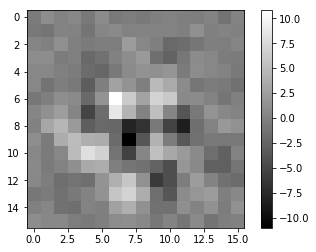

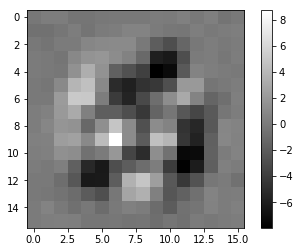

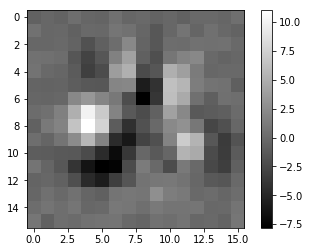

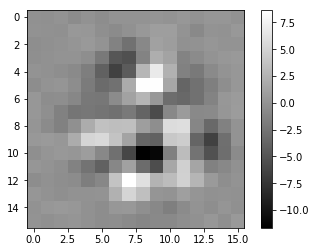

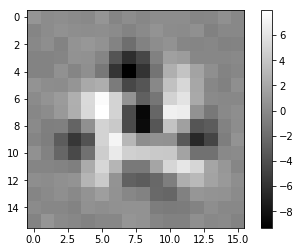

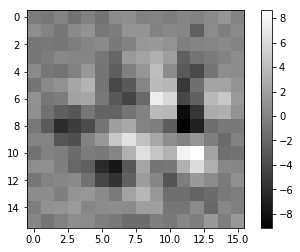

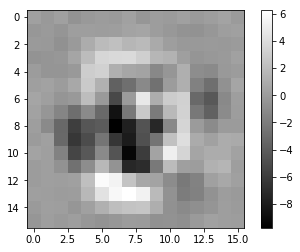

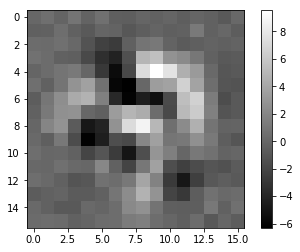

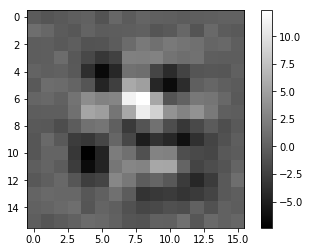

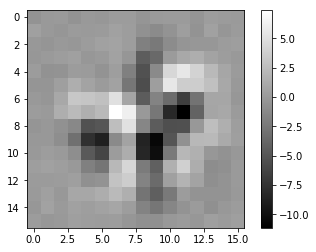

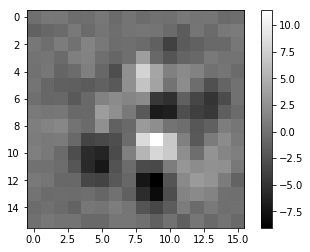

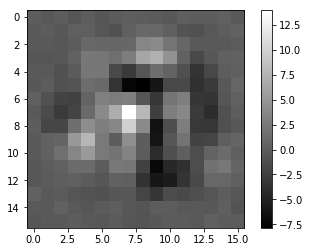

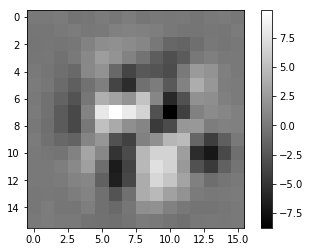

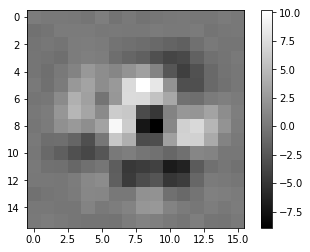

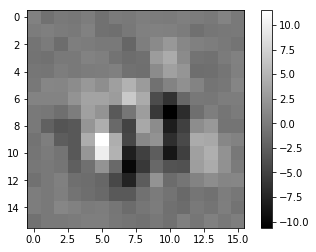

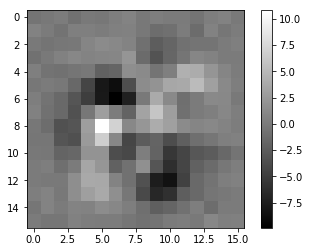

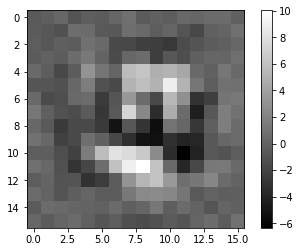

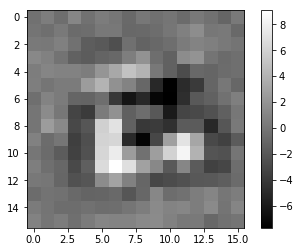

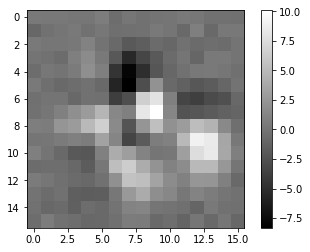

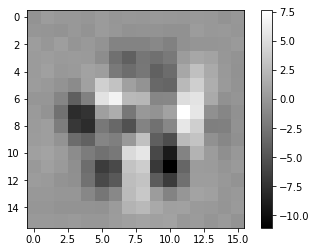

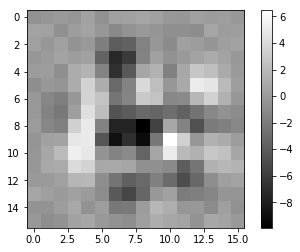

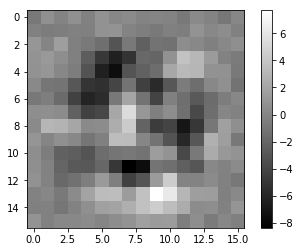

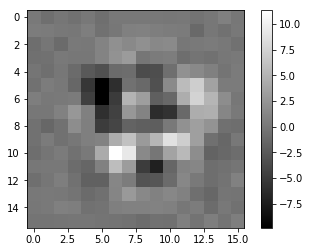

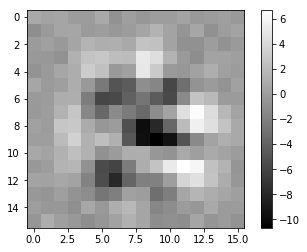

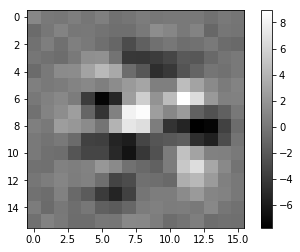

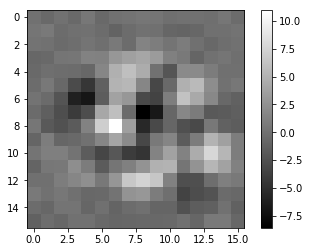

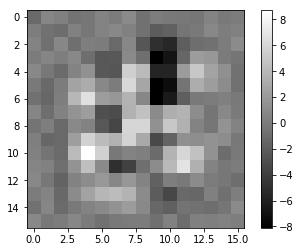

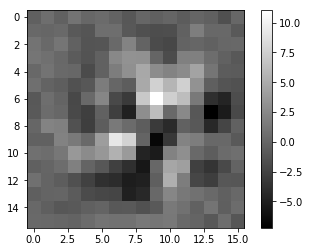

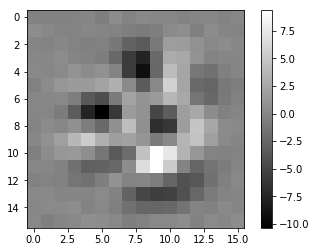

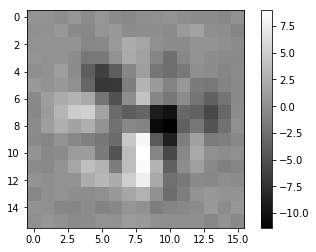

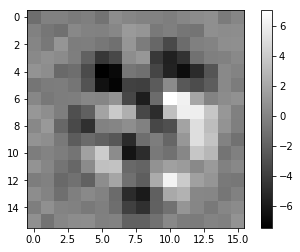

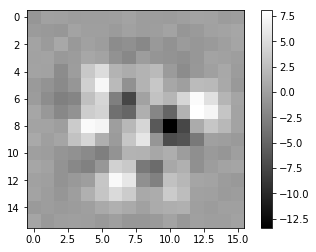

In [64]:
for i in range(32):
    u = Us[1][:,i].reshape(16,16)
    plt.figure()
    plt.imshow(u, cmap='gray')
    plt.colorbar()
    plt.show()

In [56]:
print(Uh.shape) # (96, 128)
print(np.std(Uh))
print(np.std(Us))
print(np.std(rs))
print(np.std(r_tds))

(96, 128)
1.9769442898588976
2.5833332064592653
0.23565471
0.22230960168642153


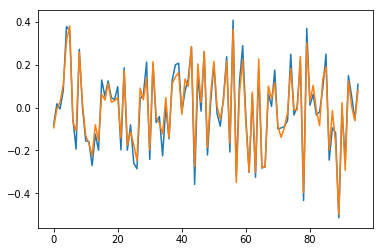

In [65]:
plt.plot(rs)
plt.plot(r_tds * 1.0)
plt.show()

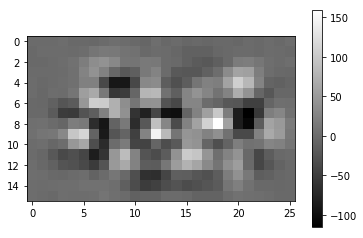

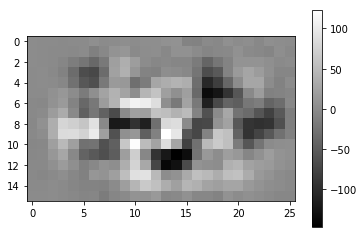

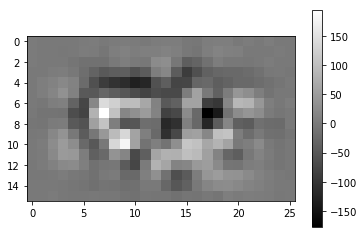

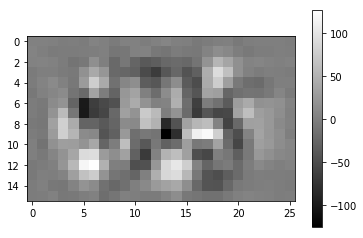

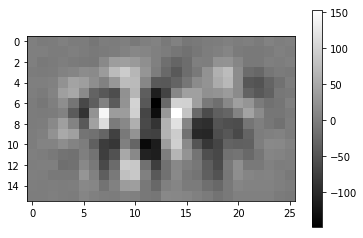

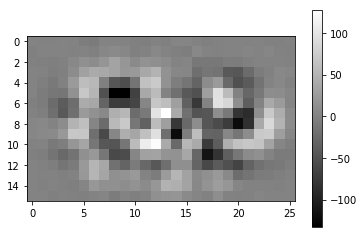

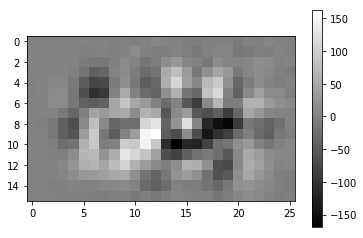

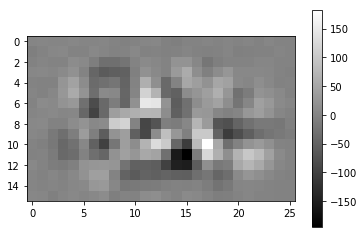

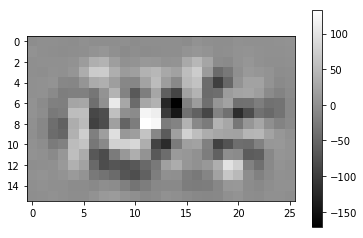

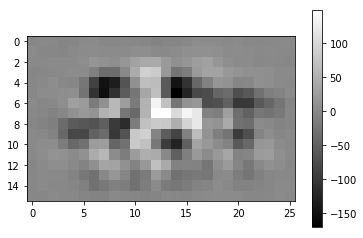

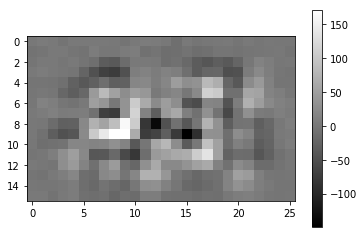

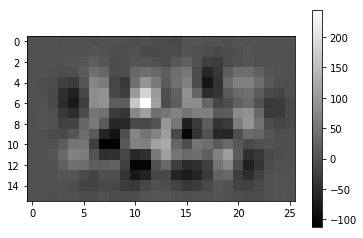

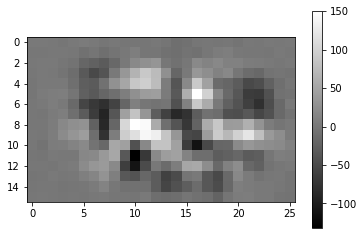

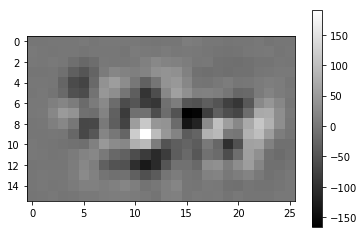

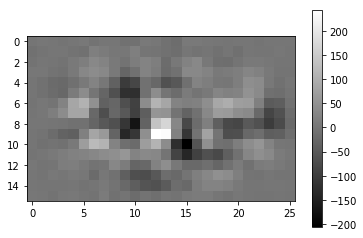

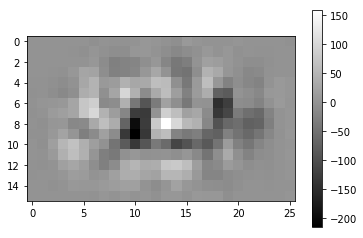

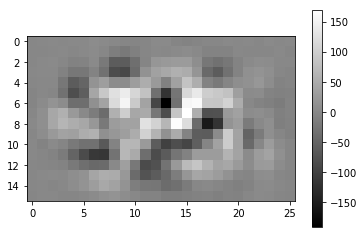

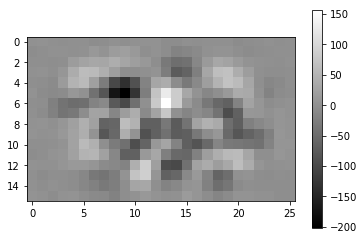

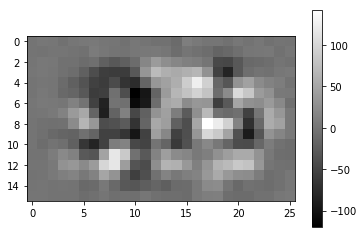

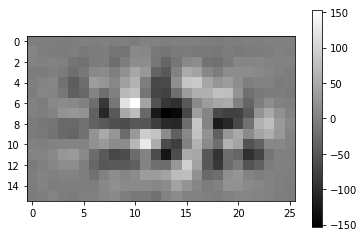

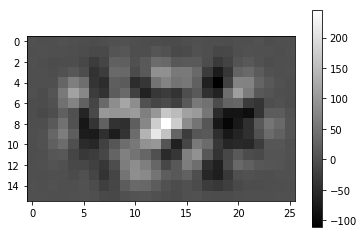

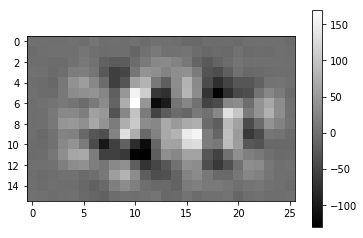

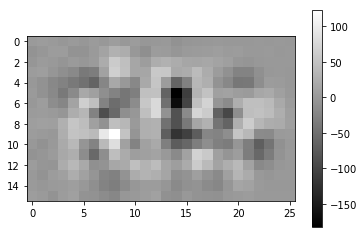

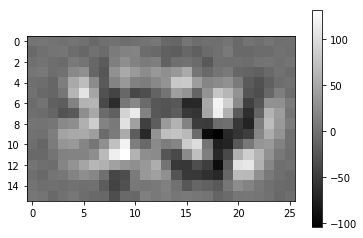

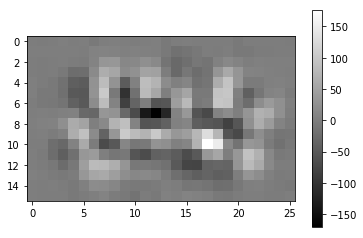

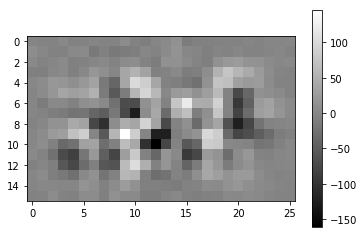

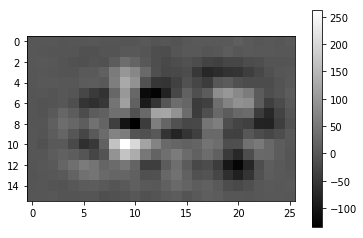

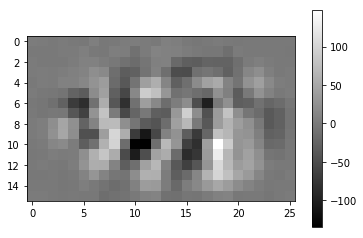

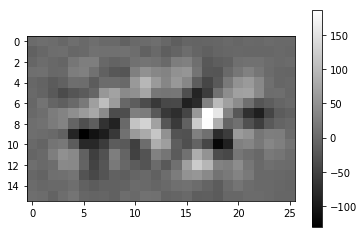

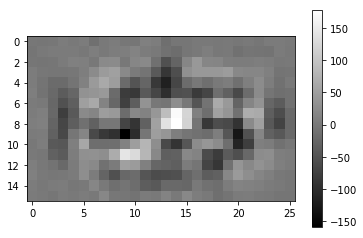

In [58]:
def get_level2_rf(index):
    Uh0 = Uh[:,index][0:32]
    Uh1 = Uh[:,index][32:64]
    Uh2 = Uh[:,index][64:96]

    UU0 = Us[0].dot(Uh0).reshape((16,16))
    UU1 = Us[1].dot(Uh1).reshape((16,16))
    UU2 = Us[2].dot(Uh2).reshape((16,16))

    RF = np.zeros((16,26), dtype=np.float32)
    RF[:, 5*0:5*0+16] += UU0
    RF[:, 5*1:5*1+16] += UU1
    RF[:, 5*2:5*2+16] += UU2    
    return RF

for i in range(30):
    rf = get_level2_rf(i)    
    plt.figure()
    plt.imshow(rf, cmap='gray')
    plt.colorbar()
    plt.show()

In [48]:
import imageio
import cv2
import os

In [49]:
if not os.path.exists("result"):
    os.mkdir("result")

for i in range(32):
    u1 = Us[1][:,i].reshape(16,16)
    u1 = cv2.resize(u1, None, fx=4, fy=4, interpolation=cv2.INTER_NEAREST)
    imageio.imwrite("result/u1_{:0>2}.png".format(i), u1)
    
for i in range(128):
    u2 = get_level2_rf(i)
    u2 = cv2.resize(u2, None, fx=4, fy=4, interpolation=cv2.INTER_NEAREST)
    imageio.imwrite("result/u2_{:0>3}.png".format(i), u2)